In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [19]:
unem = pd.read_csv('Unemployment in India.csv')

In [20]:
print("Unemployment Data:")
print(unem.head())

Unemployment Data:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


### Dataset Features

**Unemployment Data**
- Features:
* Region: Name of the state or region.
* Date: Time period (monthly).
* Frequency: Frequency of unemployment data (all are "Monthly").
* Unemployment Rate (%): Percentage unemployment in the region.
* Estimated Employed: Number of employed people in the region.
* Labour Participation Rate (%): Percentage of the population actively participating in the labor market.
* Area: Rural or Urban classification.

In [21]:
unem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


#### From the above info we can see that there are is no any missing data in the csv files


**Primary Hypothesis: Higher literacy rates correlate with lower unemployment rates in India**

- Key Questions:

1) Do states with higher literacy rates consistently report lower unemployment?
2) Are there notable differences between rural and urban regions in the relationship between literacy and unemployment?
3) Which districts or states deviate significantly from the trend, and why?

In [22]:
unemployment_data = unem
unemployment_data = unemployment_data.dropna()

In [23]:
# Standardizing column names for easier handling
unemployment_data.columns = ['Region', 'Date', 'Frequency', 'Unemployment_Rate', 'Estimated_Employed', 'Labour_Participation_Rate', 'Area']

# Standardizing state names in both datasets (if inconsistencies exist)
unemployment_data['Region'] = unemployment_data['Region'].str.strip().str.upper()


C:\Users\Dell\AppData\Local\Temp\ipykernel_19888\536602665.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
# Converting Date column to datetime for better time-series analysis
unemployment_data['Date'] = pd.to_datetime(unemployment_data['Date'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_19888\3553781025.py:2: UserWarning:

Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\Dell\AppData\Local\Temp\ipykernel_19888\3553781025.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
unemployment_data

,Region,Date,Frequency,Unemployment_Rate,Estimated_Employed,Labour_Participation_Rate,Area
0,ANDHRA PRADESH,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,ANDHRA PRADESH,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,ANDHRA PRADESH,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,ANDHRA PRADESH,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,ANDHRA PRADESH,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,WEST BENGAL,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban
750,WEST BENGAL,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban
751,WEST BENGAL,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban
752,WEST BENGAL,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban


In [26]:
# Display summary statistics
print("\nDescriptive Statistics for Unemployment Data:")
print(unemployment_data[['Unemployment_Rate', 'Estimated_Employed', 'Labour_Participation_Rate']].describe())


Descriptive Statistics for Unemployment Data:
       Unemployment_Rate  Estimated_Employed  Labour_Participation_Rate
count         740.000000        7.400000e+02                 740.000000
mean           11.787946        7.204460e+06                  42.630122
std            10.721298        8.087988e+06                   8.111094
min             0.000000        4.942000e+04                  13.330000
25%             4.657500        1.190404e+06                  38.062500
50%             8.350000        4.744178e+06                  41.160000
75%            15.887500        1.127549e+07                  45.505000
max            76.740000        4.577751e+07                  72.570000


#### Average Unemployment Rate by State

C:\Users\Dell\AppData\Local\Temp\ipykernel_19888\3295543378.py:6: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

C:\Users\Dell\AppData\Local\Temp\ipykernel_19888\3295543378.py:22: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



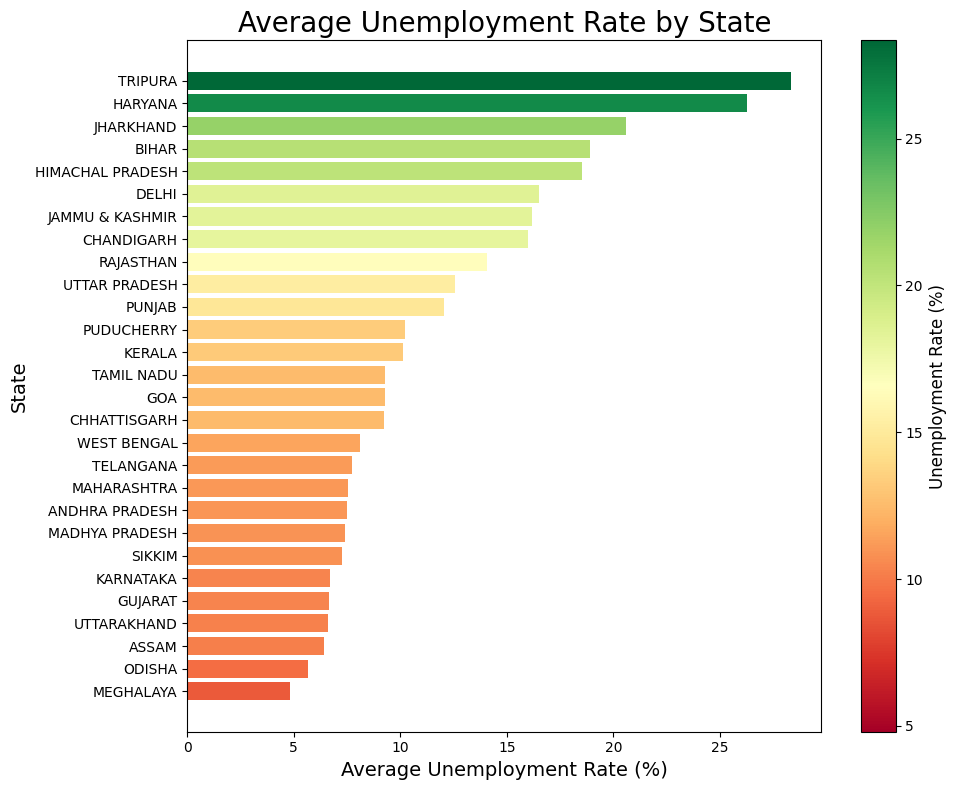

In [27]:
import matplotlib.cm as cm

state_unemployment = unemployment_data.groupby('Region', as_index=False)['Unemployment_Rate'].mean()
state_unemployment = state_unemployment.sort_values(by='Unemployment_Rate', ascending=True)

cmap = cm.get_cmap('RdYlGn')
colors = cmap(state_unemployment['Unemployment_Rate'] / state_unemployment['Unemployment_Rate'].max())

plt.figure(figsize=(10, 8))
plt.barh(
    state_unemployment['Region'],
    state_unemployment['Unemployment_Rate'],
    color=colors
)

plt.xlabel('Average Unemployment Rate (%)', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.title('Average Unemployment Rate by State', fontsize=20)

sm = cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=state_unemployment['Unemployment_Rate'].min(), vmax=state_unemployment['Unemployment_Rate'].max()))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Unemployment Rate (%)', fontsize=12)
plt.tight_layout()
plt.show()

#### Unemployment Rate Trend Over Time for Top 10 States

In [28]:
top_unemployment_states = unemployment_data.groupby('Region', as_index=False)['Unemployment_Rate'].mean()
top_10_states = top_unemployment_states.nlargest(10, 'Unemployment_Rate')
top_10_unemployment_data = unemployment_data[unemployment_data['Region'].isin(top_10_states['Region'])]

In [29]:
import plotly.express as px
fig = px.line(
    top_10_unemployment_data,
    x='Date',
    y='Unemployment_Rate',
    color='Region',
    title='Unemployment Rate Trend Over Time for Top 10 States'
)
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Unemployment Rate (%)',
    font=dict(size=14),
    title_font=dict(size=20),
    legend_title="State"
)
fig.show()

#### Unemployment rate area wise

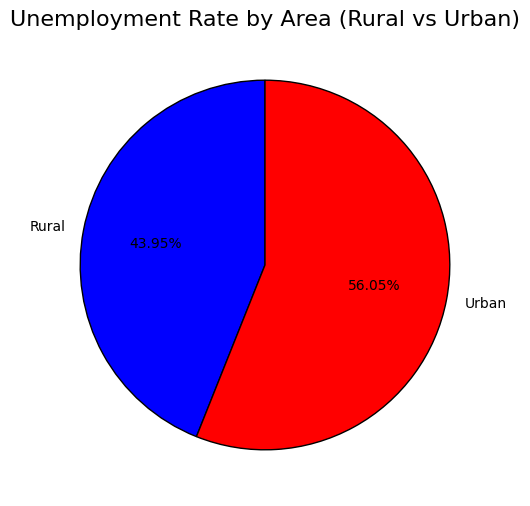

In [30]:
area_unemployment = unemployment_data.groupby('Area', as_index=False)['Unemployment_Rate'].mean()

colors = {'Rural': 'blue', 'Urban': 'red'}
area_colors = [colors[area] for area in area_unemployment['Area']]

plt.figure(figsize=(8, 6))
plt.pie(
    area_unemployment['Unemployment_Rate'],
    labels=area_unemployment['Area'],
    autopct='%1.2f%%',
    colors=area_colors,
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Unemployment Rate by Area (Rural vs Urban)', fontsize=16)
plt.show()

#### Unemployment Rate by Month Across Years

C:\Users\Dell\AppData\Local\Temp\ipykernel_19888\3509186747.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dell\AppData\Local\Temp\ipykernel_19888\3509186747.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



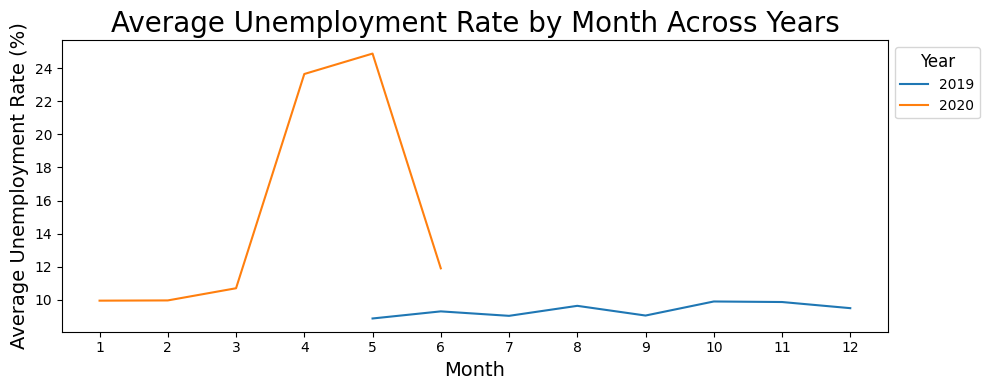

In [31]:
unemployment_data['Month'] = unemployment_data['Date'].dt.month
unemployment_data['Year'] = unemployment_data['Date'].dt.year
monthly_unemployment = unemployment_data.groupby(['Year', 'Month'], as_index=False)['Unemployment_Rate'].mean()

plt.figure(figsize=(10, 4))
for year in monthly_unemployment['Year'].unique():
    year_data = monthly_unemployment[monthly_unemployment['Year'] == year]
    plt.plot(year_data['Month'], year_data['Unemployment_Rate'], label=year)

plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Unemployment Rate (%)', fontsize=14)
plt.title('Average Unemployment Rate by Month Across Years', fontsize=20)
plt.xticks(range(1, 13))
plt.legend(title="Year", fontsize=10, title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

#### Correlation between Unemployment Rate and Estimated Employed

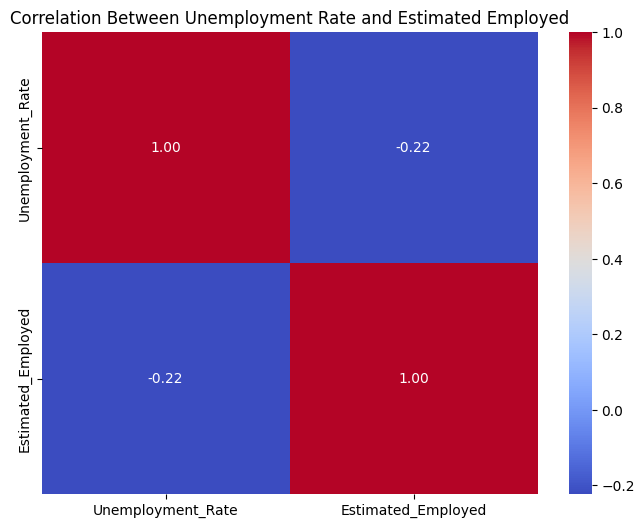

In [32]:
# Correlation between Unemployment Rate and Estimated Employed
correlation = unemployment_data[['Unemployment_Rate', 'Estimated_Employed']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Unemployment Rate and Estimated Employed')
plt.show()

#### linear regression model using the Labour Participation Rate as the independent variable to predict unemployment rates.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature selection: 'Labour_Participation_Rate' to predict 'Unemployment_Rate'
X = unemployment_data[['Labour_Participation_Rate']]
y = unemployment_data['Unemployment_Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=456)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Root Mean Squared Error of the Model: {np.sqrt(mse)}')

Root Mean Squared Error of the Model: 9.211084151023403
